<a href="https://www.kaggle.com/code/mariiasobol/14-1-task?scriptVersionId=208571681" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [69]:
import numpy as np
import tensorflow as tf
from keras.applications import VGG16
from keras import models, layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Bidirectional, SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

In [4]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [13]:
def plot_training_history(history):

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']


    epochs = range(1, len(acc) + 1)


    plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
    plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
    plt.title('Точність тренування і валідації')
    plt.legend()


    plt.figure()


    plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
    plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
    plt.title('Втрати тренування і валідації')
    plt.legend()

    plt.show()

In [15]:
def evaluate_and_predict(model, input_test, y_test, num_samples=10):

    predictions = model.predict(input_test)
    
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    print("Перші {} прогнозів:".format(num_samples))
    for i in range(num_samples):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {:.4f}'.format(test_loss))
    print('Test Accuracy: {:.4f}'.format(test_acc))

    return {
        "test_loss": test_loss,
        "test_acc": test_acc,
        "binary_predictions": binary_predictions
    }

In [22]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 46s 311ms/step - acc: 0.5467 - loss: 0.6844 - val_acc: 0.7144 - val_loss: 0.5555
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - acc: 0.7888 - loss: 0.4715 - val_acc: 0.8181 - val_loss: 0.4155
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - acc: 0.8360 - loss: 0.3806 - val_acc: 0.7079 - val_loss: 0.5716
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - acc: 0.8693 - loss: 0.3135 - val_acc: 0.8387 - val_loss: 0.3779
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - acc: 0.9057 - loss: 0.2413 - val_acc: 0.8101 - val_loss: 0.4307


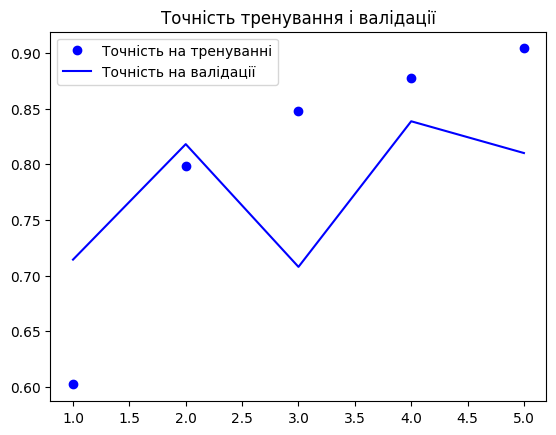

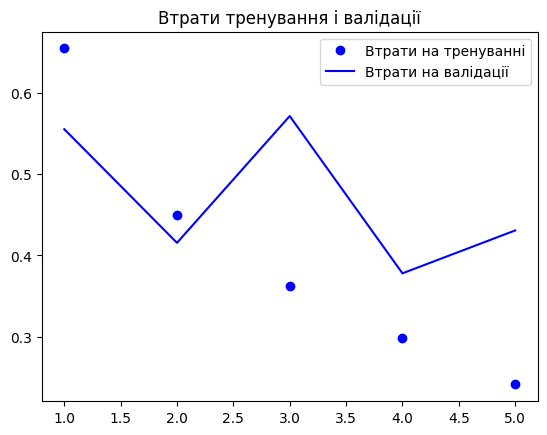

In [25]:
plot_training_history(history)

In [26]:
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
Перші 10 прогнозів:
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8105 - loss: 0.4351
Test Loss: 0.4293
Test Accuracy: 0.8114


In [30]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - acc: 0.5486 - loss: 0.6870 - val_acc: 0.7483 - val_loss: 0.5135
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.7717 - loss: 0.4788 - val_acc: 0.8297 - val_loss: 0.3835
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8416 - loss: 0.3679 - val_acc: 0.8575 - val_loss: 0.3488
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8679 - loss: 0.3196 - val_acc: 0.8397 - val_loss: 0.3866
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8820 - loss: 0.2957 - val_acc: 0.7941 - val_loss: 0.5234


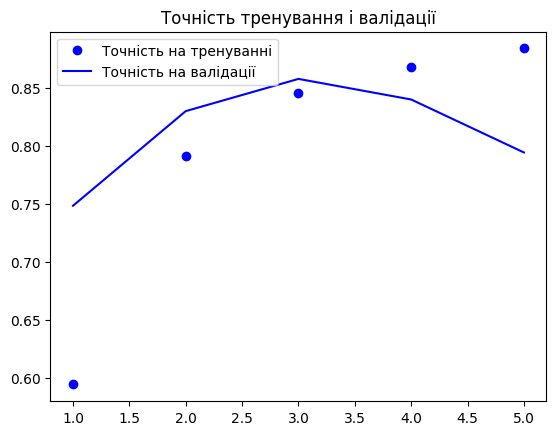

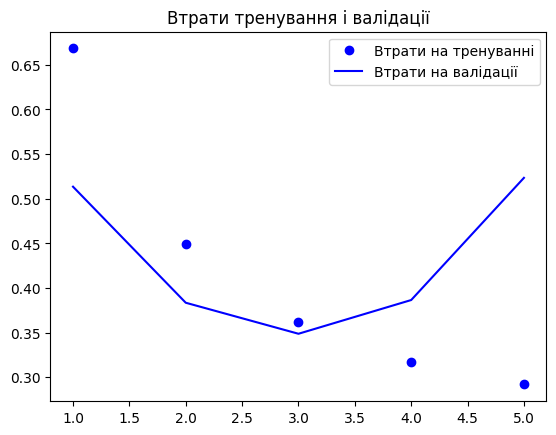

In [33]:
plot_training_history(history)

In [34]:
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Перші 10 прогнозів:
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.7860 - loss: 0.5339
Test Loss: 0.5238
Test Accuracy: 0.7896


In [35]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - acc: 0.5554 - loss: 0.6800 - val_acc: 0.6979 - val_loss: 0.5662
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.7928 - loss: 0.4579 - val_acc: 0.8355 - val_loss: 0.3842
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8568 - loss: 0.3502 - val_acc: 0.8656 - val_loss: 0.3203
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.8823 - loss: 0.2946 - val_acc: 0.8759 - val_loss: 0.3072
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - acc: 0.8876 - loss: 0.2776 - val_acc: 0.8681 - val_loss: 0.3287


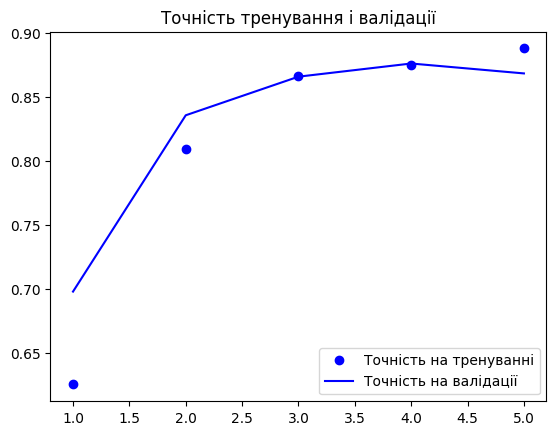

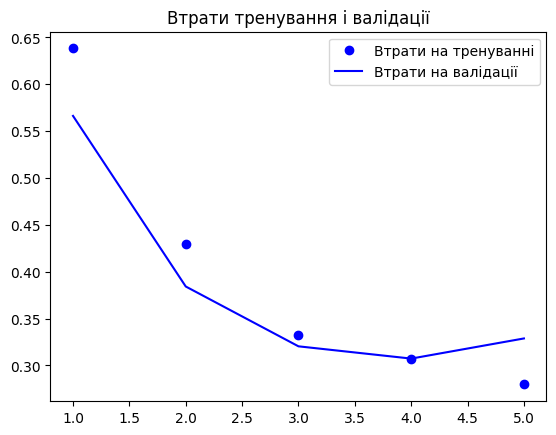

In [39]:
plot_training_history(history)

In [40]:
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Перші 10 прогнозів:
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8629 - loss: 0.3442
Test Loss: 0.3382
Test Accuracy: 0.8651


In [57]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [60]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - acc: 0.5309 - loss: 0.6881 - val_acc: 0.7600 - val_loss: 0.5285
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - acc: 0.7775 - loss: 0.4908 - val_acc: 0.7901 - val_loss: 0.4641
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.8438 - loss: 0.3747 - val_acc: 0.8289 - val_loss: 0.3886
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.8705 - loss: 0.3232 - val_acc: 0.8752 - val_loss: 0.3160
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.9046 - loss: 0.2543 - val_acc: 0.8132 - val_loss: 0.4554


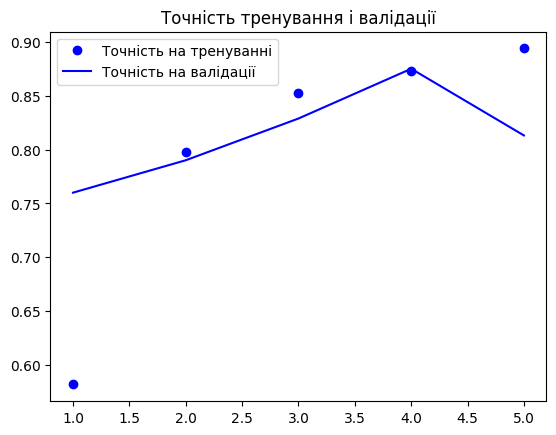

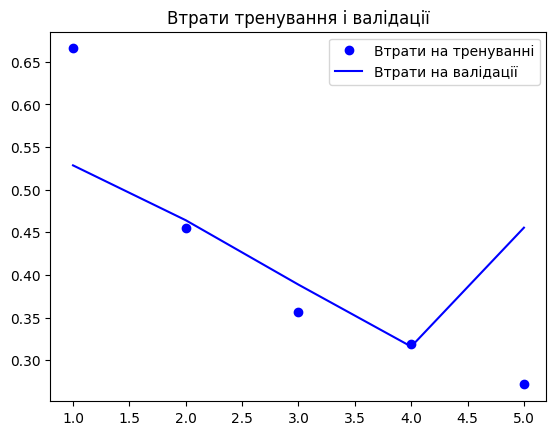

In [61]:
plot_training_history(history)

In [62]:
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
Перші 10 прогнозів:
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8099 - loss: 0.4679
Test Loss: 0.4687
Test Accuracy: 0.8078


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - acc: 0.6201 - loss: 0.6303 - val_acc: 0.7004 - val_loss: 0.6786
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - acc: 0.8481 - loss: 0.3645 - val_acc: 0.8429 - val_loss: 0.3578
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - acc: 0.8819 - loss: 0.2989 - val_acc: 0.8755 - val_loss: 0.3101
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - acc: 0.9012 - loss: 0.2597 - val_acc: 0.8648 - val_loss: 0.3141
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - acc: 0.9139 - loss: 0.2284 - val_acc: 0.8756 - val_loss: 0.2973


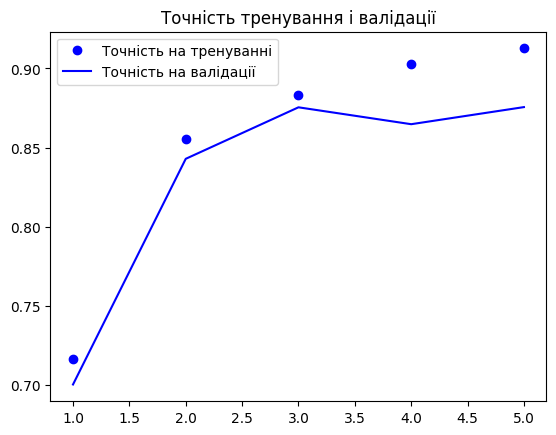

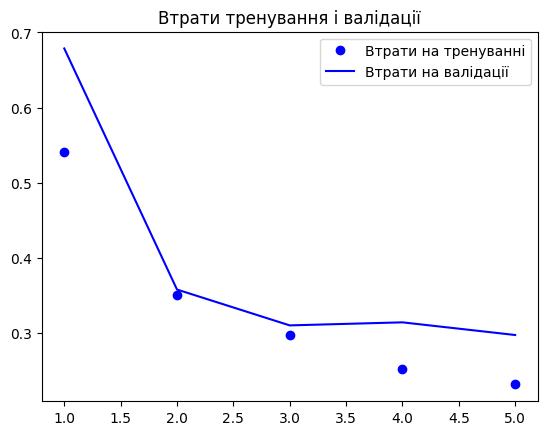

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Перші 10 прогнозів:
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8700 - loss: 0.3091
Test Loss: 0.3069
Test Accuracy: 0.8718


In [56]:
model = Sequential()

model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=64, validation_split=0.3)

plot_training_history(history)
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_13                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 23s 140ms/step - acc: 0.6584 - loss: 0.5783 - val_acc: 0.8487 - val_loss: 0.3617
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - acc: 0.8957 - loss: 0.2660 - val_acc: 0.8833 - val_loss: 0.2919
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - acc: 0.9411 - loss: 0.1605 - val_acc: 0.8668 - val_loss: 0.3476
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - acc: 0.9635 - loss: 0.1139 - val_acc: 0.8684 - val_loss: 0.3826
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 137ms/step - acc: 0.9763 - loss: 0.0766 - val_acc: 0.8549 - val_loss: 0.4243


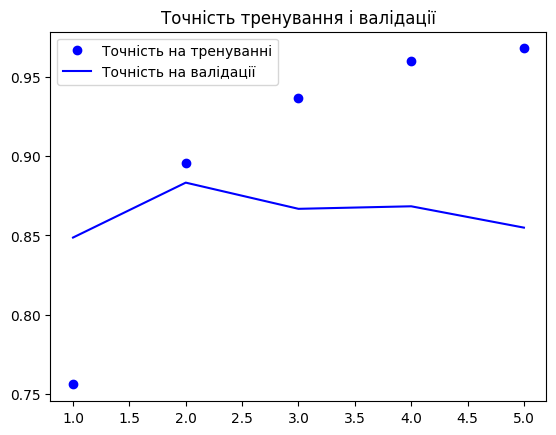

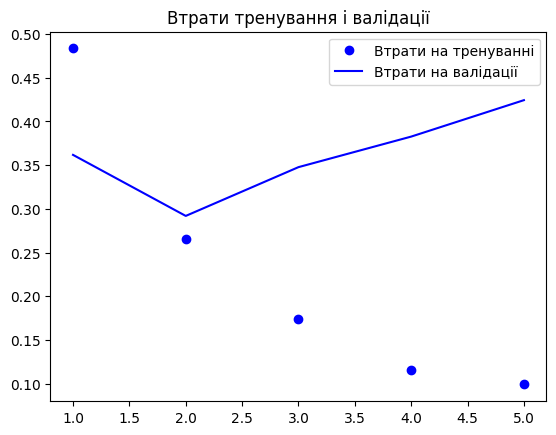

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step
Перші 10 прогнозів:
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - acc: 0.8563 - loss: 0.4237
Test Loss: 0.4186
Test Accuracy: 0.8564


In [72]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3, callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

plot_training_history(history)
results = evaluate_and_predict(model, input_test, y_test, num_samples=10)

Отже, як видно з результатів усіх досліджень найефективнішим методом виявився LSTM, який дав точність понад 87%